# Analyzing Video game sales data using Pandas

This is an introductory level notebook exploring some trends in the video game sales data. This is a submitted course project (zerotopandas.com) 

## Downloading the Dataset

We can easily download the dataset from Kaggle directly, using the `opendatasets` library

In [3]:
!pip install jovian opendatasets --upgrade --quiet


Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 


In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: seeyesbot
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 82.0MB/s]

The dataset has been downloaded and extracted.

In [6]:
# create a dataset pointer string
data_dir = './videogamesales'

In [7]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "zerotopandas-course-project" 

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

<IPython.core.display.Javascript object>

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/chakravarthy-sudharshan/zerotopandas-course-project


<IPython.core.display.Javascript object>

## Data Preparation and Cleaning

Even though we take our data (which may already be curated) from Kaggle, there might still be some frailities like missing value, undefined numbers, etc. The aim is to load the dataset and get some basic stats on it.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data_df = pd.read_csv("./videogamesales/vgsales.csv")

In [39]:
data_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
data_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [41]:
data_df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [42]:
data_df["Year"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: Year, Length: 16598, dtype: bool

In [43]:
data_df.dropna(inplace = True) 

It looks like we don't have any missing values. Moreover, the dimension of the dataset at hand is `16598 * 11` (rows * columns). An important point to note is that the sales data is provided in millions. 


In [45]:
import jovian

In [46]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/chakravarthy-sudharshan/zerotopandas-course-project


<IPython.core.display.Javascript object>

## Exploratory Analysis and Visualization

Now, let's visualize some trends in the dataset using `matplotlib.pyplot` and `seaborn`, along with some exploration of numerical values. The basic stats such as mean, standard deviation, and range can be found out using the `describe()` as shown above. 



In [47]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's plot the column "Year" against "Global Sales" - directly, to see if there is any immediate connection.

In [48]:
data_df["Year"] = data_df["Year"].astype("int") 
sorted_df = data_df.sort_values(by = ["Year"])
sorted_df.head(-10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
6317,6319,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
1969,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
5366,5368,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
1766,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16224,16227,New Interpretation Stranger of Sword City,PSV,2016,Role-Playing,Experience Inc.,0.00,0.00,0.01,0.00,0.01
16222,16225,Carmageddon: Max Damage,XOne,2016,Action,Stainless Games,0.01,0.01,0.00,0.00,0.01
15716,15719,Nil Admirari no Tenbin: Teito Genwaku Toukidan,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
16220,16223,Dynasty Warriors: Eiketsuden,PS4,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01


Text(0, 0.5, 'Sales (in millions)')

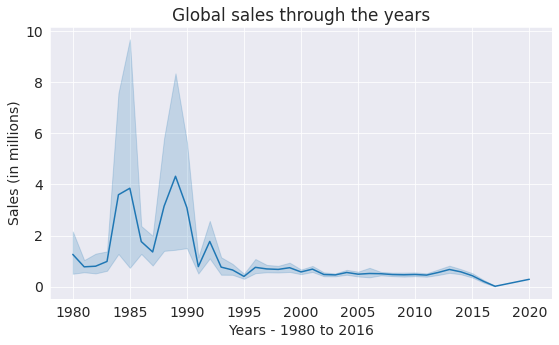

In [55]:
sns.lineplot(sorted_df.Year, sorted_df.Global_Sales);
plt.title("Global sales through the years")
plt.xlabel("Years - 1980 to 2016")
plt.ylabel("Sales (in millions)")

Number of games in each genre throught the years

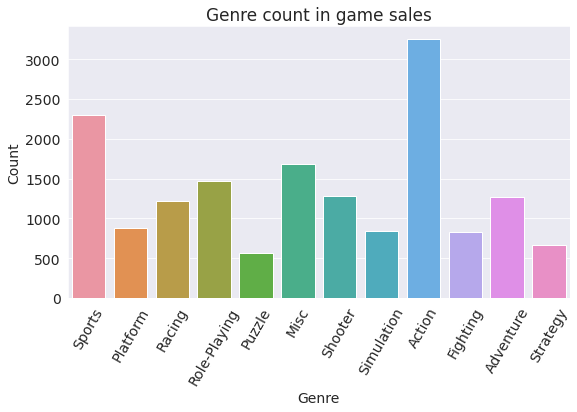

In [60]:
count = sns.countplot(data_df.Genre)
plt.title("Genre count in game sales")
plt.xlabel("Genre")
plt.ylabel("Count")
count.set_xticklabels(data_df.Genre.unique(),rotation = 60);


Correlation between Europe sales and North America sales through the years

Text(0, 0.5, 'North America')

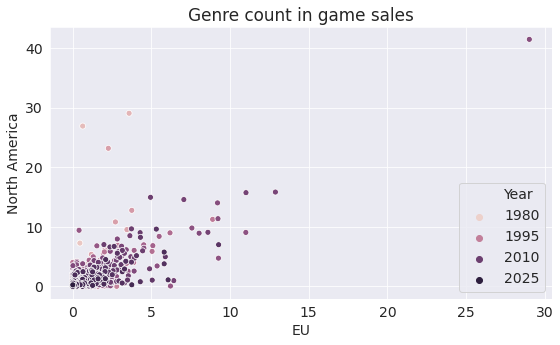

In [70]:
sns.scatterplot(sorted_df.EU_Sales, sorted_df.NA_Sales, hue = sorted_df.Year)
plt.title("Correlation between EU and North America sales")
plt.xlabel("EU")
plt.ylabel("North America")


Number of games by various platforms

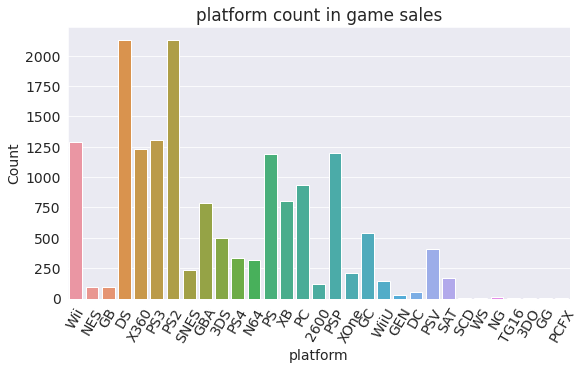

In [65]:
platform_count = sns.countplot(x=data_df.Platform)
plt.title("platform count in game sales")
plt.xlabel("platform")
plt.ylabel("Count")
platform_count.set_xticklabels(data_df.Platform.unique(),rotation = 60);

In [71]:
import jovian

In [72]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/chakravarthy-sudharshan/zerotopandas-course-project


<IPython.core.display.Javascript object>

## Insights




### Q1: In what direction has the year-wise sum of sales in Japan trended? 
### A1: There has been an increase initially, and it has decreased eventually after around 2005


In [97]:
jp_df = data_df.groupby(["Year"]).sum()["JP_Sales"]
index_values = jp_df.index
jp_df.head()

Year
1980     0.00
1981     0.00
1982     0.00
1983     8.10
1984    14.27
Name: JP_Sales, dtype: float64

Text(0, 0.5, 'Sales in Millions')

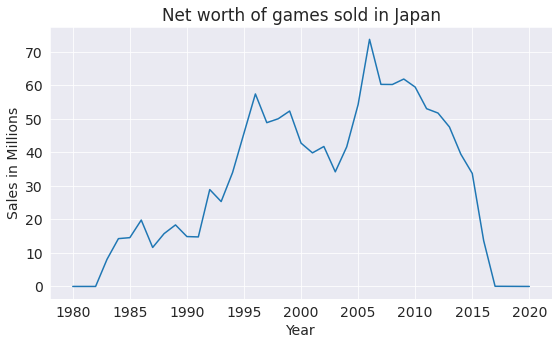

In [98]:
jp = sns.lineplot(y = jp_df, x = index_values)
plt.title("Net worth of games sold in Japan")
plt.xlabel("Year")
plt.ylabel("Sales in Millions")

### Q2: Who are the top 5 game publishers in terms of the number of games?

In [106]:
publisher_df = data_df.groupby(["Publisher"]).sum()
top_five = publisher_df.sort_values(by="Global_Sales", ascending=False)[0:5]
top_five

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2646098,1394666,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,7102442,2686562,584.22,367.38,13.98,127.63,1093.39
Activision,6324706,1938979,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,4098421,1367034,265.22,187.55,74.10,80.40,607.28
Ubisoft,6945872,1843194,252.81,163.03,7.33,50.16,473.54


### Q3: When it comes to misc. sales (Other_Sales), how are the top 5 ranked?

In [107]:
top_five

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2646098,1394666,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,7102442,2686562,584.22,367.38,13.98,127.63,1093.39
Activision,6324706,1938979,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,4098421,1367034,265.22,187.55,74.10,80.40,607.28
Ubisoft,6945872,1843194,252.81,163.03,7.33,50.16,473.54


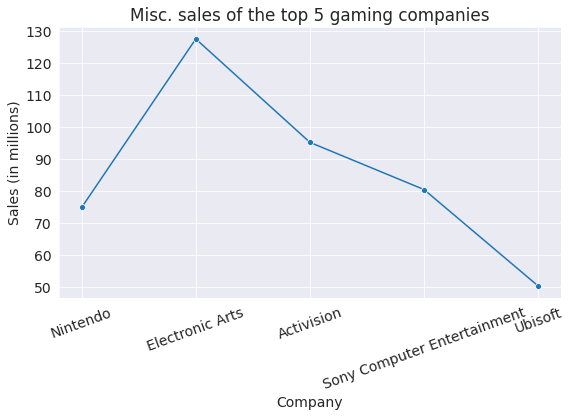

In [115]:
misc = sns.lineplot(top_five.index, top_five.Other_Sales, marker = "o");
plt.title("Misc. sales of the top 5 gaming companies")
plt.xlabel("Company")
plt.ylabel("Sales (in millions)")
misc.set_xticklabels(top_five.index,rotation = 20);

### Q4: What percent of the sales was contributed by the North American continent for the top 5 gaming companies?

In [116]:
top_five

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2646098,1394666,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,7102442,2686562,584.22,367.38,13.98,127.63,1093.39
Activision,6324706,1938979,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,4098421,1367034,265.22,187.55,74.10,80.40,607.28
Ubisoft,6945872,1843194,252.81,163.03,7.33,50.16,473.54


In [118]:
top_five["NA_Percent"] = top_five["NA_Sales"] / top_five["Global_Sales"] * 100

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Percent
Publisher,,,,,,,,
Nintendo,2646098,1394666,815.75,418.30,454.99,95.19,1784.43,45.714878
Electronic Arts,7102442,2686562,584.22,367.38,13.98,127.63,1093.39,53.431987
Activision,6324706,1938979,426.01,213.72,6.54,74.79,721.41,59.052411
Sony Computer Entertainment,4098421,1367034,265.22,187.55,74.10,80.40,607.28,43.673429
Ubisoft,6945872,1843194,252.81,163.03,7.33,50.16,473.54,53.387253


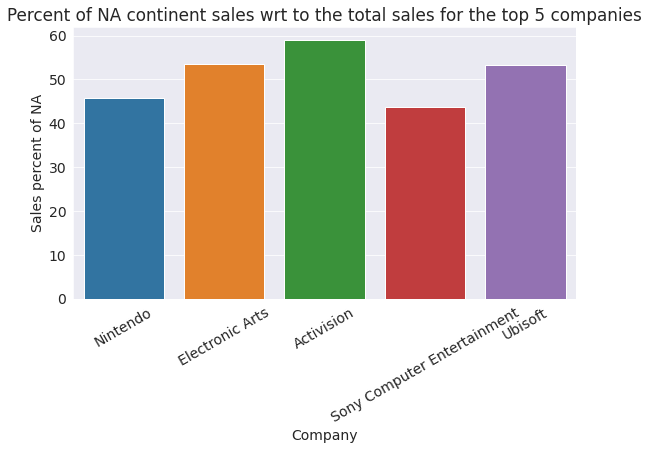

In [121]:
misc = sns.barplot(top_five.index, top_five.NA_Percent);
plt.title("Percent of NA continent sales wrt to the total sales for the top 5 companies")
plt.xlabel("Company")
plt.ylabel("Sales percent of NA")
misc.set_xticklabels(top_five.index,rotation = 30);

### Q5: Rank the Genre by its sales. In other words, which genre brings in the most money?

In [122]:
genre_df = data_df.groupby(["Genre"]).sum()
genre_df

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,25955792,6527703,861.77,516.48,158.65,184.92,1722.84
Adventure,14704318,2558355,101.93,63.74,51.99,16.70,234.59
Fighting,6371780,1675871,220.74,100.00,87.15,36.19,444.05
Misc,14445141,3384308,396.92,211.77,106.67,73.92,789.87
Platform,6019939,1753335,445.99,200.65,130.65,51.51,829.13
Puzzle,5496785,1142980,122.01,50.52,56.68,12.47,242.21
Racing,9699328,2455923,356.93,236.31,56.61,76.68,726.76
Role-Playing,11840252,2950365,326.50,187.57,350.29,59.38,923.83
Shooter,9399409,2571588,575.16,310.45,38.18,101.90,1026.20


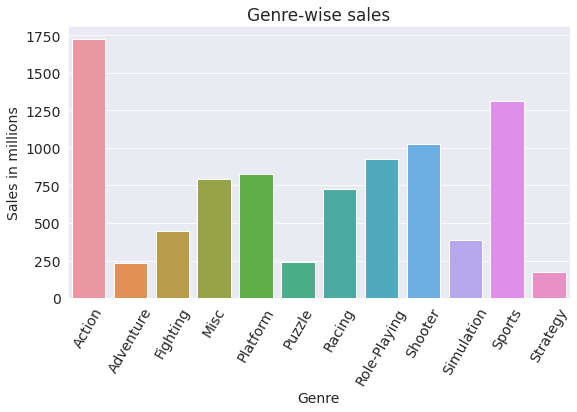

In [125]:
g = sns.barplot(genre_df.index, genre_df.Global_Sales)
plt.title("Genre-wise sales")
plt.xlabel("Genre")
plt.ylabel("Sales in millions")
g.set_xticklabels(genre_df.index,rotation = 60);

In [126]:
import jovian

In [127]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/chakravarthy-sudharshan/zerotopandas-course-project


<IPython.core.display.Javascript object>

## Inferences and Conclusion

* Action and Sports genre has the highest traction in terms of sales
* Percentage of NA sales is almost 50% for the top 5 companies
* EA pips Sony,Ubisoft and the likes for misc. sales (toys, merchendise)
* In Japan, gaming sales have been rapidly dropping since 2005

In [128]:
import jovian

In [130]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/chakravarthy-sudharshan/zerotopandas-course-project


<IPython.core.display.Javascript object>

## Future Work

We can see if this data is available for recent years as well, and try to gauge the current status of the gaming industry 

In [133]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/chakravarthy-sudharshan/zerotopandas-course-project


<IPython.core.display.Javascript object>